In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

import traceback

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ushuaia ar
saleaula ws
vardo no
bluff nz
longyearbyen sj
bengkulu id
cape town za
geraldton au
norman wells ca
yellowknife ca
upernavik gl
dicabisagan ph
jiexiu cn
ponta do sol pt
busselton au
vaini to
richards bay za
pangnirtung ca
airai pw
fortuna us
punta arenas cl
constitucion mx
hermanus za
vaini to
tuatapere nz
kavieng pg
albany au
saskylakh ru
ushuaia ar
mount isa au
hohhot cn
tiksi ru
puerto ayora ec
taolanaro mg
mataura pf
albany au
hobyo so
port lincoln au
victoria sc
broome au
tura ru
illoqqortoormiut gl
kapaa us
ushuaia ar
deputatskiy ru
ushuaia ar
bengkalis id
bambous virieux mu
morgan city us
bredasdorp za
atuona pf
saint-denis re
tuatapere nz
belushya guba ru
bluff nz
mahebourg mu
albany au
rikitea pf
dimbokro ci
tessalit ml
busselton au
new norfolk au
port blair in
east london za
amderma ru
nanortalik gl
jamestown sh
hermanus za
hobart au
rikitea pf
oktyabrskoye ru
svetlogorsk ru
bilibino ru
butaritari ki
labuhan id
hermanus za
esperance au
mataura pf
nago jp
puerto ayo

rocha uy
aksarayskiy ru
hermanus za
omboue ga
karavukovo rs
ushuaia ar
mataura pf
albany au
hermanus za
vila velha br
tura ru
rikitea pf
albany au
pemangkat id
dalby au
grand river south east mu
norman wells ca
ushuaia ar
chapais ca
lebu cl
tessalit ml
lebu cl
saldanha za
svetlogorsk ru
illoqqortoormiut gl
pangnirtung ca
jamestown sh
mahebourg mu
sitka us
samusu ws
korop ua
saint-leu re
manacapuru br
torbay ca
dikson ru
rosarito mx
ribeira grande pt
saskylakh ru
katsuura jp
kaeo nz
vaitupu wf
vorsma ru
busselton au
nehe cn
la macarena co
ushuaia ar
kamenskoye ru
faqirwali pk
pevek ru
castro cl
illoqqortoormiut gl
puerto ayora ec
barentsburg sj
tuatapere nz
taolanaro mg
orange cove us
vredendal za
barrow us
mataura pf
tromso no
castro cl
vaitupu wf
sangar ru
dingle ie
nikolskoye ru
airai pw
cape town za
upernavik gl
kilindoni tz
vaini to
hilo us
angoche mz
mentok id
avarua ck
jatai br
klaksvik fo
omboue ga
faanui pf
chalakudi in
new norfolk au
samusu ws
marcona pe
vanavara ru
mehamn no


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

579

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [92]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


In [94]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [81]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [97]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        print("city name is ", city)
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # If an error is experienced, skip the city.
    except Exception as e:
        traceback.print_exc()
        print("error in the code is", e)
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 44 of Set 23 | ribeira grande
city name is  ribeira grande
Processing Record 45 of Set 23 | dolbeau
city name is  dolbeau
error in the code is 'coord'
City not found. Skipping...
Processing Record 46 of Set 23 | punta arenas
city name is  punta arenas


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 47 of Set 23 | umzimvubu
city name is  umzimvubu
error in the code is 'coord'
City not found. Skipping...
Processing Record 48 of Set 23 | beringovskiy
city name is  beringovskiy


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 49 of Set 23 | port elizabeth
city name is  port elizabeth
Processing Record 50 of Set 23 | qaanaaq
city name is  qaanaaq
Processing Record 51 of Set 23 | carnarvon
city name is  carnarvon
Processing Record 52 of Set 23 | busselton
city name is  busselton
Processing Record 53 of Set 23 | havre-saint-pierre
city name is  havre-saint-pierre
Processing Record 54 of Set 23 | hobart
city name is  hobart
Processing Record 55 of Set 23 | nikolskoye
city name is  nikolskoye
Processing Record 56 of Set 23 | dingle
city name is  dingle
Processing Record 57 of Set 23 | lebu
city name is  lebu
Processing Record 58 of Set 23 | victoria
city name is  victoria
Processing Record 59 of Set 23 | katsuura
city name is  katsuura
Processing Record 60 of Set 23 | sarakhs
city name is  sarakhs
Processing Record 61 of Set 23 | vaini
city name is  vaini
Processing Record 62 of Set 23 | mount isa
city name is  mount isa
Processing Record 63 of Set 23 | barrow
city name is  barrow
Processing Re

Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


error in the code is 'coord'
City not found. Skipping...
Processing Record 72 of Set 23 | yerbogachen
city name is  yerbogachen
Processing Record 73 of Set 23 | arraial do cabo
city name is  arraial do cabo
Processing Record 74 of Set 23 | rikitea
city name is  rikitea
Processing Record 75 of Set 23 | santa isabel do rio negro
city name is  santa isabel do rio negro
Processing Record 76 of Set 23 | gazojak
city name is  gazojak
Processing Record 77 of Set 23 | sangar
city name is  sangar
Processing Record 78 of Set 23 | hohhot
city name is  hohhot
Processing Record 79 of Set 23 | madoc
city name is  madoc
Processing Record 80 of Set 23 | vanimo
city name is  vanimo
Processing Record 81 of Set 23 | terrace bay
city name is  terrace bay
Processing Record 82 of Set 23 | amderma
city name is  amderma
error in the code is 'coord'
City not found. Skipping...
Processing Record 83 of Set 23 | dawlatabad
city name is  dawlatabad


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 84 of Set 23 | saskylakh
city name is  saskylakh
Processing Record 85 of Set 23 | cochrane
city name is  cochrane
Processing Record 86 of Set 23 | longyearbyen
city name is  longyearbyen
Processing Record 87 of Set 23 | comodoro rivadavia
city name is  comodoro rivadavia
Processing Record 88 of Set 23 | san patricio
city name is  san patricio
Processing Record 89 of Set 23 | bluff
city name is  bluff
Processing Record 90 of Set 23 | mataura
city name is  mataura
Processing Record 91 of Set 23 | saleaula
city name is  saleaula
error in the code is 'coord'
City not found. Skipping...
Processing Record 92 of Set 23 | riohacha
city name is  riohacha


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 93 of Set 23 | ushuaia
city name is  ushuaia
Processing Record 1 of Set 24 | panormos
city name is  panormos
Processing Record 2 of Set 24 | portland
city name is  portland
Processing Record 3 of Set 24 | cape town
city name is  cape town
Processing Record 4 of Set 24 | norman wells
city name is  norman wells
Processing Record 5 of Set 24 | upernavik
city name is  upernavik
Processing Record 6 of Set 24 | iquique
city name is  iquique
Processing Record 7 of Set 24 | nago
city name is  nago
Processing Record 8 of Set 24 | aginskoye
city name is  aginskoye
Processing Record 9 of Set 24 | khatanga
city name is  khatanga
Processing Record 10 of Set 24 | fort nelson
city name is  fort nelson
Processing Record 11 of Set 24 | georgetown
city name is  georgetown
Processing Record 12 of Set 24 | thompson
city name is  thompson
Processing Record 13 of Set 24 | amla
city name is  amla
Processing Record 14 of Set 24 | serebryanyy bor
city name is  serebryanyy bor
Processing Recor

Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 23 of Set 24 | netarhat
city name is  netarhat
Processing Record 24 of Set 24 | rudnogorsk
city name is  rudnogorsk
Processing Record 25 of Set 24 | necochea
city name is  necochea
Processing Record 26 of Set 24 | puerto ayora
city name is  puerto ayora
Processing Record 27 of Set 24 | vaitupu
city name is  vaitupu
error in the code is 'coord'
City not found. Skipping...
Processing Record 28 of Set 24 | tsihombe
city name is  tsihombe


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'
Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


error in the code is 'coord'
City not found. Skipping...
Processing Record 29 of Set 24 | souillac
city name is  souillac
Processing Record 30 of Set 24 | sampit
city name is  sampit
Processing Record 31 of Set 24 | gibara
city name is  gibara
Processing Record 32 of Set 24 | yomitan
city name is  yomitan
error in the code is 'coord'
City not found. Skipping...
Processing Record 33 of Set 24 | salalah
city name is  salalah


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 34 of Set 24 | isangel
city name is  isangel
Processing Record 35 of Set 24 | hithadhoo
city name is  hithadhoo
Processing Record 36 of Set 24 | xichang
city name is  xichang
Processing Record 37 of Set 24 | kamenka
city name is  kamenka
Processing Record 38 of Set 24 | saryshagan
city name is  saryshagan


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


error in the code is 'coord'
City not found. Skipping...
Processing Record 39 of Set 24 | goulburn
city name is  goulburn
Processing Record 40 of Set 24 | albany
city name is  albany
Processing Record 41 of Set 24 | pemangkat
city name is  pemangkat
Processing Record 42 of Set 24 | tazovskiy
city name is  tazovskiy
Processing Record 43 of Set 24 | tuktoyaktuk
city name is  tuktoyaktuk
Processing Record 44 of Set 24 | nanortalik
city name is  nanortalik
Processing Record 45 of Set 24 | presidencia roque saenz pena
city name is  presidencia roque saenz pena
Processing Record 46 of Set 24 | kenai
city name is  kenai
Processing Record 47 of Set 24 | ahipara
city name is  ahipara
Processing Record 48 of Set 24 | karaul
city name is  karaul


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


error in the code is 'coord'
City not found. Skipping...
Processing Record 49 of Set 24 | yar-sale
city name is  yar-sale
Processing Record 50 of Set 24 | vilhena
city name is  vilhena
Processing Record 1 of Set 25 | port alfred
city name is  port alfred
Processing Record 2 of Set 25 | te anau
city name is  te anau
Processing Record 3 of Set 25 | illoqqortoormiut
city name is  illoqqortoormiut
error in the code is 'coord'
City not found. Skipping...
Processing Record 4 of Set 25 | san andres
city name is  san andres


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 5 of Set 25 | utena
city name is  utena
Processing Record 6 of Set 25 | uwayl
city name is  uwayl
error in the code is 'coord'
City not found. Skipping...
Processing Record 7 of Set 25 | severo-kurilsk
city name is  severo-kurilsk


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 8 of Set 25 | mar del plata
city name is  mar del plata
Processing Record 9 of Set 25 | jamestown
city name is  jamestown
Processing Record 10 of Set 25 | ancud
city name is  ancud
Processing Record 11 of Set 25 | roald
city name is  roald
Processing Record 12 of Set 25 | leningradskiy
city name is  leningradskiy
Processing Record 13 of Set 25 | morgan city
city name is  morgan city
Processing Record 14 of Set 25 | coihaique
city name is  coihaique
Processing Record 15 of Set 25 | chalmette
city name is  chalmette
Processing Record 16 of Set 25 | tamiahua
city name is  tamiahua
Processing Record 17 of Set 25 | yellowknife
city name is  yellowknife
Processing Record 18 of Set 25 | dikson
city name is  dikson
Processing Record 19 of Set 25 | talnakh
city name is  talnakh
Processing Record 20 of Set 25 | puerto madryn
city name is  puerto madryn
Processing Record 21 of Set 25 | maraba
city name is  maraba
Processing Record 22 of Set 25 | saint anthony
city name is  saint

Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 6 of Set 26 | kavieng
city name is  kavieng
Processing Record 7 of Set 26 | rosarito
city name is  rosarito
Processing Record 8 of Set 26 | samusu
city name is  samusu


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


error in the code is 'coord'
City not found. Skipping...
Processing Record 9 of Set 26 | port lincoln
city name is  port lincoln
Processing Record 10 of Set 26 | benguela
city name is  benguela
Processing Record 11 of Set 26 | khonuu
city name is  khonuu
error in the code is 'coord'
City not found. Skipping...
Processing Record 12 of Set 26 | zhezkazgan
city name is  zhezkazgan


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 13 of Set 26 | faanui
city name is  faanui
Processing Record 14 of Set 26 | cherskiy
city name is  cherskiy
Processing Record 15 of Set 26 | nizhniy tsasuchey
city name is  nizhniy tsasuchey
Processing Record 16 of Set 26 | barentsburg
city name is  barentsburg
error in the code is 'coord'
City not found. Skipping...
Processing Record 17 of Set 26 | pangnirtung
city name is  pangnirtung


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 18 of Set 26 | caravelas
city name is  caravelas
Processing Record 19 of Set 26 | ilulissat
city name is  ilulissat
Processing Record 20 of Set 26 | ulaangom
city name is  ulaangom
Processing Record 21 of Set 26 | maiduguri
city name is  maiduguri
Processing Record 22 of Set 26 | paamiut
city name is  paamiut
Processing Record 23 of Set 26 | faya
city name is  faya
Processing Record 24 of Set 26 | lesosibirsk
city name is  lesosibirsk
Processing Record 25 of Set 26 | altay
city name is  altay
Processing Record 26 of Set 26 | walvis bay
city name is  walvis bay
Processing Record 27 of Set 26 | bambous virieux
city name is  bambous virieux
Processing Record 28 of Set 26 | predeal
city name is  predeal
Processing Record 29 of Set 26 | lala
city name is  lala
Processing Record 30 of Set 26 | gulshat
city name is  gulshat
error in the code is 'coord'
City not found. Skipping...
Processing Record 31 of Set 26 | labuhan
city name is  labuhan


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 32 of Set 26 | maniitsoq
city name is  maniitsoq
Processing Record 33 of Set 26 | khartoum
city name is  khartoum
Processing Record 34 of Set 26 | avila
city name is  avila
Processing Record 35 of Set 26 | acapulco
city name is  acapulco
Processing Record 36 of Set 26 | butaritari
city name is  butaritari
Processing Record 37 of Set 26 | westport
city name is  westport
Processing Record 38 of Set 26 | esperance
city name is  esperance
Processing Record 39 of Set 26 | naze
city name is  naze
Processing Record 40 of Set 26 | kodiak
city name is  kodiak
Processing Record 41 of Set 26 | acarau
city name is  acarau
Processing Record 42 of Set 26 | mehamn
city name is  mehamn
Processing Record 43 of Set 26 | lesnica
city name is  lesnica
Processing Record 44 of Set 26 | castro
city name is  castro
Processing Record 45 of Set 26 | aconibe
city name is  aconibe
Processing Record 46 of Set 26 | tabiauea
city name is  tabiauea
error in the code is 'coord'
City not found. Skippi

Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'
Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


error in the code is 'coord'
City not found. Skipping...
Processing Record 48 of Set 26 | yelizovo
city name is  yelizovo
Processing Record 49 of Set 26 | harper
city name is  harper
Processing Record 50 of Set 26 | karamea
city name is  karamea


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


error in the code is 'coord'
City not found. Skipping...
Processing Record 1 of Set 27 | hami
city name is  hami
Processing Record 2 of Set 27 | kiruna
city name is  kiruna
Processing Record 3 of Set 27 | balabac
city name is  balabac
Processing Record 4 of Set 27 | provideniya
city name is  provideniya
Processing Record 5 of Set 27 | scarborough
city name is  scarborough
Processing Record 6 of Set 27 | krasnogvardeyskiy
city name is  krasnogvardeyskiy
Processing Record 7 of Set 27 | havelock
city name is  havelock
Processing Record 8 of Set 27 | baykit
city name is  baykit
Processing Record 9 of Set 27 | airai
city name is  airai
Processing Record 10 of Set 27 | torbay
city name is  torbay
Processing Record 11 of Set 27 | ambunti
city name is  ambunti
Processing Record 12 of Set 27 | padang
city name is  padang
Processing Record 13 of Set 27 | cidreira
city name is  cidreira
Processing Record 14 of Set 27 | taltal
city name is  taltal
Processing Record 15 of Set 27 | agua dulce
city n

Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 24 of Set 27 | port blair
city name is  port blair
Processing Record 25 of Set 27 | ajtos
city name is  ajtos
Processing Record 26 of Set 27 | kapaa
city name is  kapaa
Processing Record 27 of Set 27 | lantawan
city name is  lantawan
Processing Record 28 of Set 27 | norton
city name is  norton
Processing Record 29 of Set 27 | iqaluit
city name is  iqaluit
Processing Record 30 of Set 27 | port macquarie
city name is  port macquarie
Processing Record 31 of Set 27 | soyo
city name is  soyo
Processing Record 32 of Set 27 | mount gambier
city name is  mount gambier
Processing Record 33 of Set 27 | port-gentil
city name is  port-gentil
Processing Record 34 of Set 27 | santiago de chuco
city name is  santiago de chuco
Processing Record 35 of Set 27 | nalut
city name is  nalut
Processing Record 36 of Set 27 | tasbuget
city name is  tasbuget
error in the code is 'coord'
City not found. Skipping...
Processing Record 37 of Set 27 | chapleau
city name is  chapleau


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 38 of Set 27 | imeni poliny osipenko
city name is  imeni poliny osipenko
Processing Record 39 of Set 27 | shelburne
city name is  shelburne
Processing Record 40 of Set 27 | vila velha
city name is  vila velha
Processing Record 41 of Set 27 | lorengau
city name is  lorengau
Processing Record 42 of Set 27 | fairlie
city name is  fairlie
Processing Record 43 of Set 27 | axim
city name is  axim
Processing Record 44 of Set 27 | gat
city name is  gat
Processing Record 45 of Set 27 | bukachacha
city name is  bukachacha
Processing Record 46 of Set 27 | hokitika
city name is  hokitika
Processing Record 47 of Set 27 | los llanos de aridane
city name is  los llanos de aridane
Processing Record 48 of Set 27 | avarua
city name is  avarua
Processing Record 49 of Set 27 | maraa
city name is  maraa
Processing Record 50 of Set 27 | verkhnevilyuysk
city name is  verkhnevilyuysk
Processing Record 1 of Set 28 | bereda
city name is  bereda
Processing Record 2 of Set 28 | cayenne
city name

Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 10 of Set 28 | dir
city name is  dir
Processing Record 11 of Set 28 | jacareacanga
city name is  jacareacanga
Processing Record 12 of Set 28 | lavrentiya
city name is  lavrentiya
Processing Record 13 of Set 28 | coahuayana
city name is  coahuayana
Processing Record 14 of Set 28 | rio cuarto
city name is  rio cuarto
Processing Record 15 of Set 28 | kapoeta
city name is  kapoeta
Processing Record 16 of Set 28 | kudahuvadhoo
city name is  kudahuvadhoo
Processing Record 17 of Set 28 | urusha
city name is  urusha
Processing Record 18 of Set 28 | constantine
city name is  constantine
Processing Record 19 of Set 28 | rio grande
city name is  rio grande
Processing Record 20 of Set 28 | julio de castilhos
city name is  julio de castilhos
Processing Record 21 of Set 28 | adamas
city name is  adamas
Processing Record 22 of Set 28 | half moon bay
city name is  half moon bay
Processing Record 23 of Set 28 | chuy
city name is  chuy
Processing Record 24 of Set 28 | lagoa
city name i

Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'
Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


error in the code is 'coord'
City not found. Skipping...
Processing Record 32 of Set 28 | yaan
city name is  yaan
Processing Record 33 of Set 28 | lima
city name is  lima
Processing Record 34 of Set 28 | maketu
city name is  maketu
Processing Record 35 of Set 28 | elk plain
city name is  elk plain
Processing Record 36 of Set 28 | requena
city name is  requena
Processing Record 37 of Set 28 | san cristobal
city name is  san cristobal
Processing Record 38 of Set 28 | tucupita
city name is  tucupita
Processing Record 39 of Set 28 | marcona
city name is  marcona
error in the code is 'coord'
City not found. Skipping...
Processing Record 40 of Set 28 | raudeberg
city name is  raudeberg


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 41 of Set 28 | vardo
city name is  vardo
Processing Record 42 of Set 28 | douentza
city name is  douentza
Processing Record 43 of Set 28 | rajpipla
city name is  rajpipla
Processing Record 44 of Set 28 | kanel
city name is  kanel
Processing Record 45 of Set 28 | alindao
city name is  alindao
Processing Record 46 of Set 28 | jambi
city name is  jambi
Processing Record 47 of Set 28 | mirpur sakro
city name is  mirpur sakro
Processing Record 48 of Set 28 | kristiinankaupunki
city name is  kristiinankaupunki
Processing Record 49 of Set 28 | grand river south east
city name is  grand river south east
error in the code is 'coord'
City not found. Skipping...
Processing Record 50 of Set 28 | aykhal
city name is  aykhal


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 1 of Set 29 | casian
city name is  casian
Processing Record 2 of Set 29 | bethel
city name is  bethel
Processing Record 3 of Set 29 | berlevag
city name is  berlevag
Processing Record 4 of Set 29 | temir
city name is  temir
Processing Record 5 of Set 29 | saint-joseph
city name is  saint-joseph
Processing Record 6 of Set 29 | edeleny
city name is  edeleny
Processing Record 7 of Set 29 | calabozo
city name is  calabozo
Processing Record 8 of Set 29 | codrington
city name is  codrington
Processing Record 9 of Set 29 | seoul
city name is  seoul
Processing Record 10 of Set 29 | gamba
city name is  gamba
Processing Record 11 of Set 29 | one hundred mile house
city name is  one hundred mile house
error in the code is 'coord'
City not found. Skipping...
Processing Record 12 of Set 29 | atar
city name is  atar


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 13 of Set 29 | aguimes
city name is  aguimes
Processing Record 14 of Set 29 | aloleng
city name is  aloleng
Processing Record 15 of Set 29 | alice springs
city name is  alice springs
Processing Record 16 of Set 29 | pine bluff
city name is  pine bluff
Processing Record 17 of Set 29 | hobyo
city name is  hobyo
Processing Record 18 of Set 29 | mareeba
city name is  mareeba
Processing Record 19 of Set 29 | aksarayskiy
city name is  aksarayskiy
Processing Record 20 of Set 29 | saint-pierre
city name is  saint-pierre
Processing Record 21 of Set 29 | namatanai
city name is  namatanai
Processing Record 22 of Set 29 | palabuhanratu
city name is  palabuhanratu


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


error in the code is 'coord'
City not found. Skipping...
Processing Record 23 of Set 29 | mahebourg
city name is  mahebourg
Processing Record 24 of Set 29 | qaqortoq
city name is  qaqortoq
Processing Record 25 of Set 29 | tuatapere
city name is  tuatapere
Processing Record 26 of Set 29 | aklavik
city name is  aklavik
Processing Record 27 of Set 29 | kwinana
city name is  kwinana
Processing Record 28 of Set 29 | klaksvik
city name is  klaksvik
Processing Record 29 of Set 29 | nishihara
city name is  nishihara
Processing Record 30 of Set 29 | christchurch
city name is  christchurch
Processing Record 31 of Set 29 | nenjiang
city name is  nenjiang
Processing Record 32 of Set 29 | beloha
city name is  beloha
Processing Record 33 of Set 29 | avera
city name is  avera
Processing Record 34 of Set 29 | luderitz
city name is  luderitz
Processing Record 35 of Set 29 | soe
city name is  soe
Processing Record 36 of Set 29 | brigantine
city name is  brigantine
Processing Record 37 of Set 29 | stettl

Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


error in the code is 'coord'
City not found. Skipping...
Processing Record 7 of Set 30 | sao filipe
city name is  sao filipe
Processing Record 8 of Set 30 | mizpe ramon
city name is  mizpe ramon
error in the code is 'coord'
City not found. Skipping...
Processing Record 9 of Set 30 | goderich
city name is  goderich


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 10 of Set 30 | south venice
city name is  south venice
Processing Record 11 of Set 30 | japura
city name is  japura
Processing Record 12 of Set 30 | likasi
city name is  likasi
Processing Record 13 of Set 30 | puerto del rosario
city name is  puerto del rosario
Processing Record 14 of Set 30 | chilapa
city name is  chilapa
Processing Record 15 of Set 30 | hasaki
city name is  hasaki
Processing Record 16 of Set 30 | sao miguel do araguaia
city name is  sao miguel do araguaia
Processing Record 17 of Set 30 | teluknaga
city name is  teluknaga
Processing Record 18 of Set 30 | tripoli
city name is  tripoli
Processing Record 19 of Set 30 | patiya
city name is  patiya
Processing Record 20 of Set 30 | alta floresta
city name is  alta floresta
Processing Record 21 of Set 30 | tiznit
city name is  tiznit
Processing Record 22 of Set 30 | chardara
city name is  chardara
Processing Record 23 of Set 30 | hirado
city name is  hirado
Processing Record 24 of Set 30 | pisco
city name i

Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


nouadhibou
Processing Record 29 of Set 30 | malinovskiy
city name is  malinovskiy
Processing Record 30 of Set 30 | mishkino
city name is  mishkino
Processing Record 31 of Set 30 | oban
city name is  oban
Processing Record 32 of Set 30 | balezino
city name is  balezino
Processing Record 33 of Set 30 | cachoeiras de macacu
city name is  cachoeiras de macacu
Processing Record 34 of Set 30 | haslett
city name is  haslett
Processing Record 35 of Set 30 | sisimiut
city name is  sisimiut
Processing Record 36 of Set 30 | sikeston
city name is  sikeston
Processing Record 37 of Set 30 | college
city name is  college
Processing Record 38 of Set 30 | hambantota
city name is  hambantota
Processing Record 39 of Set 30 | nantucket
city name is  nantucket
Processing Record 40 of Set 30 | clyde river
city name is  clyde river
Processing Record 41 of Set 30 | denpasar
city name is  denpasar
Processing Record 42 of Set 30 | portage
city name is  portage
Processing Record 43 of Set 30 | olafsvik
city name

Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


error in the code is 'coord'
City not found. Skipping...
Processing Record 10 of Set 31 | camapua
city name is  camapua
Processing Record 11 of Set 31 | sergeyevka
city name is  sergeyevka
Processing Record 12 of Set 31 | bani walid
city name is  bani walid
Processing Record 13 of Set 31 | hamilton
city name is  hamilton
Processing Record 14 of Set 31 | mayo
city name is  mayo
Processing Record 15 of Set 31 | thinadhoo
city name is  thinadhoo
Processing Record 16 of Set 31 | nizhneangarsk
city name is  nizhneangarsk
Processing Record 17 of Set 31 | memaliaj
city name is  memaliaj
Processing Record 18 of Set 31 | fortuna
city name is  fortuna
Processing Record 19 of Set 31 | biltine
city name is  biltine
Processing Record 20 of Set 31 | tabuk
city name is  tabuk
Processing Record 21 of Set 31 | cockburn town
city name is  cockburn town
Processing Record 22 of Set 31 | andevoranto
city name is  andevoranto
error in the code is 'coord'
City not found. Skipping...
Processing Record 23 of S

Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 24 of Set 31 | bababe
city name is  bababe
error in the code is 'coord'
City not found. Skipping...
Processing Record 25 of Set 31 | komsomolskiy
city name is  komsomolskiy


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 26 of Set 31 | crib point
city name is  crib point
Processing Record 27 of Set 31 | koubia
city name is  koubia
Processing Record 28 of Set 31 | huron
city name is  huron
Processing Record 29 of Set 31 | khandbari
city name is  khandbari
Processing Record 30 of Set 31 | waingapu
city name is  waingapu
Processing Record 31 of Set 31 | sitka
city name is  sitka
Processing Record 32 of Set 31 | llanelli
city name is  llanelli
Processing Record 33 of Set 31 | hay river
city name is  hay river
Processing Record 34 of Set 31 | warqla
city name is  warqla


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


error in the code is 'coord'
City not found. Skipping...
Processing Record 35 of Set 31 | vredendal
city name is  vredendal
Processing Record 36 of Set 31 | plettenberg bay
city name is  plettenberg bay
Processing Record 37 of Set 31 | okhotsk
city name is  okhotsk
Processing Record 38 of Set 31 | kerman
city name is  kerman
Processing Record 39 of Set 31 | hue
city name is  hue
Processing Record 40 of Set 31 | onega
city name is  onega
Processing Record 41 of Set 31 | khandyga
city name is  khandyga
Processing Record 42 of Set 31 | asau
city name is  asau
Processing Record 43 of Set 31 | sao joao da barra
city name is  sao joao da barra
Processing Record 44 of Set 31 | elizabeth city
city name is  elizabeth city
Processing Record 45 of Set 31 | yuci
city name is  yuci
Processing Record 46 of Set 31 | ngukurr
city name is  ngukurr
error in the code is 'coord'
City not found. Skipping...
Processing Record 47 of Set 31 | petatlan
city name is  petatlan


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 48 of Set 31 | valdivia
city name is  valdivia
Processing Record 49 of Set 31 | along
city name is  along
Processing Record 50 of Set 31 | pemba
city name is  pemba
Processing Record 1 of Set 32 | vagur
city name is  vagur
Processing Record 2 of Set 32 | kahului
city name is  kahului
Processing Record 3 of Set 32 | kodinsk
city name is  kodinsk
Processing Record 4 of Set 32 | alekseyevka
city name is  alekseyevka
Processing Record 5 of Set 32 | douglas
city name is  douglas
Processing Record 6 of Set 32 | karauzyak
city name is  karauzyak
error in the code is 'coord'
City not found. Skipping...
Processing Record 7 of Set 32 | hingoli
city name is  hingoli


Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 8 of Set 32 | kpandae
city name is  kpandae
Processing Record 9 of Set 32 | touros
city name is  touros
Processing Record 10 of Set 32 | oxford
city name is  oxford
Processing Record 11 of Set 32 | valle hermoso
city name is  valle hermoso
Processing Record 12 of Set 32 | bonoua
city name is  bonoua
Processing Record 13 of Set 32 | morondava
city name is  morondava
Processing Record 14 of Set 32 | bourail
city name is  bourail
Processing Record 15 of Set 32 | loa janan
city name is  loa janan
Processing Record 16 of Set 32 | dicabisagan
city name is  dicabisagan
Processing Record 17 of Set 32 | cabedelo
city name is  cabedelo
Processing Record 18 of Set 32 | afua
city name is  afua
Processing Record 19 of Set 32 | biak
city name is  biak
Processing Record 20 of Set 32 | nhulunbuy
city name is  nhulunbuy
Processing Record 21 of Set 32 | kargasok
city name is  kargasok
Processing Record 22 of Set 32 | udachnyy
city name is  udachnyy
Processing Record 23 of Set 32 | sheb

Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 4 of Set 33 | evensk
city name is  evensk
Processing Record 5 of Set 33 | kananga
city name is  kananga
Processing Record 6 of Set 33 | quelimane
city name is  quelimane
Processing Record 7 of Set 33 | grand-lahou
city name is  grand-lahou
Processing Record 8 of Set 33 | keuruu
city name is  keuruu
Processing Record 9 of Set 33 | broken hill
city name is  broken hill
Processing Record 10 of Set 33 | saint-augustin
city name is  saint-augustin
Processing Record 11 of Set 33 | trinidad
city name is  trinidad
Processing Record 12 of Set 33 | tsabong
city name is  tsabong
Processing Record 13 of Set 33 | bandarbeyla
city name is  bandarbeyla
Processing Record 14 of Set 33 | moses lake
city name is  moses lake
Processing Record 15 of Set 33 | kousseri
city name is  kousseri
Processing Record 16 of Set 33 | muros
city name is  muros
Processing Record 17 of Set 33 | bugiri
city name is  bugiri
Processing Record 18 of Set 33 | meyungs
city name is  meyungs
error in the code i

Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'
Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


error in the code is 'coord'
City not found. Skipping...
Processing Record 20 of Set 33 | altamont
city name is  altamont
Processing Record 21 of Set 33 | cukai
city name is  cukai
Processing Record 22 of Set 33 | buluang
city name is  buluang
Processing Record 23 of Set 33 | erzin
city name is  erzin
Processing Record 24 of Set 33 | vila
city name is  vila
Processing Record 25 of Set 33 | sovetskiy
city name is  sovetskiy
Processing Record 26 of Set 33 | amalfi
city name is  amalfi
Processing Record 27 of Set 33 | mogadishu
city name is  mogadishu
Processing Record 28 of Set 33 | jega
city name is  jega
Processing Record 29 of Set 33 | tias
city name is  tias
Processing Record 30 of Set 33 | iskateley
city name is  iskateley
Processing Record 31 of Set 33 | nichinan
city name is  nichinan
Processing Record 32 of Set 33 | caxito
city name is  caxito
Processing Record 33 of Set 33 | northam
city name is  northam
Processing Record 34 of Set 33 | attawapiskat
city name is  attawapiskat
er

Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


Processing Record 36 of Set 33 | agadez
city name is  agadez
Processing Record 37 of Set 33 | porto novo
city name is  porto novo
Processing Record 38 of Set 33 | solnechnyy
city name is  solnechnyy
Processing Record 39 of Set 33 | agadir
city name is  agadir
Processing Record 40 of Set 33 | bathsheba
city name is  bathsheba
Processing Record 41 of Set 33 | whitehorse
city name is  whitehorse
Processing Record 42 of Set 33 | thongwa
city name is  thongwa
Processing Record 43 of Set 33 | itoman
city name is  itoman
Processing Record 44 of Set 33 | chandbali
city name is  chandbali
Processing Record 45 of Set 33 | amarante do maranhao
city name is  amarante do maranhao
Processing Record 46 of Set 33 | tromso
city name is  tromso
Processing Record 47 of Set 33 | bryant
city name is  bryant
Processing Record 48 of Set 33 | huarmey
city name is  huarmey
Processing Record 49 of Set 33 | shingu
city name is  shingu
Processing Record 50 of Set 33 | shuyskoye
city name is  shuyskoye
Processing 

Traceback (most recent call last):
  File "<ipython-input-97-f366d1aedc5d>", line 22, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'


error in the code is 'coord'
City not found. Skipping...
Processing Record 8 of Set 34 | arlit
city name is  arlit
Processing Record 9 of Set 34 | mubi
city name is  mubi
Processing Record 10 of Set 34 | rio branco
city name is  rio branco
Processing Record 11 of Set 34 | galle
city name is  galle
Processing Record 12 of Set 34 | broome
city name is  broome
Processing Record 13 of Set 34 | paranaiba
city name is  paranaiba
Processing Record 14 of Set 34 | grand gaube
city name is  grand gaube
Processing Record 15 of Set 34 | kununurra
city name is  kununurra
Processing Record 16 of Set 34 | skjervoy
city name is  skjervoy
Processing Record 17 of Set 34 | opuwo
city name is  opuwo
Processing Record 18 of Set 34 | nemuro
city name is  nemuro
Processing Record 19 of Set 34 | vila franca do campo
city name is  vila franca do campo
Processing Record 20 of Set 34 | ballina
city name is  ballina
Processing Record 21 of Set 34 | ranong
city name is  ranong
Processing Record 22 of Set 34 | hofn

In [98]:
len(city_data)

549

In [100]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,70.48,64,100,6.89,PT,2021-09-23 21:12:47
1,Punta Arenas,-53.1500,-70.9167,48.31,57,75,14.97,CL,2021-09-23 21:12:47
2,Beringovskiy,63.0500,179.3167,35.80,98,100,11.65,RU,2021-09-23 21:03:51
3,Port Elizabeth,-33.9180,25.5701,62.10,75,43,13.85,ZA,2021-09-23 21:12:48
4,Qaanaaq,77.4840,-69.3632,16.20,62,97,6.71,GL,2021-09-23 21:02:54
5,Carnarvon,-24.8667,113.6333,66.40,80,0,22.59,AU,2021-09-23 21:03:28
6,Busselton,-33.6500,115.3333,43.09,80,0,10.36,AU,2021-09-23 21:12:49
7,Havre-Saint-Pierre,50.2334,-63.5986,50.27,80,100,10.54,CA,2021-09-23 21:12:49
8,Hobart,-42.8794,147.3294,49.86,74,20,3.00,AU,2021-09-23 21:08:22
9,Nikolskoye,59.7035,30.7861,47.01,93,99,9.22,RU,2021-09-23 21:12:50


In [101]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-09-23 21:12:47,38.5167,-28.7000,70.48,64,100,6.89
1,Punta Arenas,CL,2021-09-23 21:12:47,-53.1500,-70.9167,48.31,57,75,14.97
2,Beringovskiy,RU,2021-09-23 21:03:51,63.0500,179.3167,35.80,98,100,11.65
3,Port Elizabeth,ZA,2021-09-23 21:12:48,-33.9180,25.5701,62.10,75,43,13.85
4,Qaanaaq,GL,2021-09-23 21:02:54,77.4840,-69.3632,16.20,62,97,6.71
...,...,...,...,...,...,...,...,...,...
544,Fayetteville,US,2021-09-23 21:15:08,35.0527,-78.8784,80.10,46,1,5.01
545,Waipawa,NZ,2021-09-23 21:16:29,-41.4122,175.5153,57.45,63,2,5.39
546,Loiza,PR,2021-09-23 21:16:30,18.4313,-65.8802,91.38,62,40,6.91
547,Malanje,AO,2021-09-23 21:16:30,-9.5402,16.3410,73.49,55,100,10.20


In [102]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [103]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

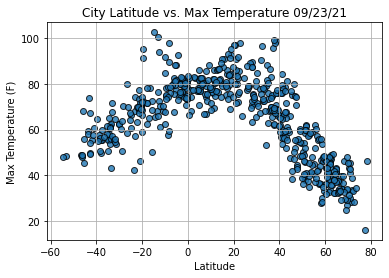

In [104]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

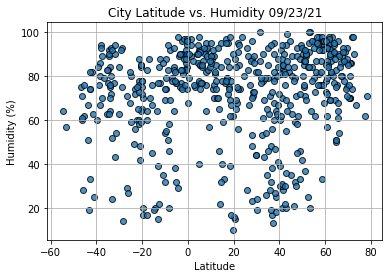

In [105]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

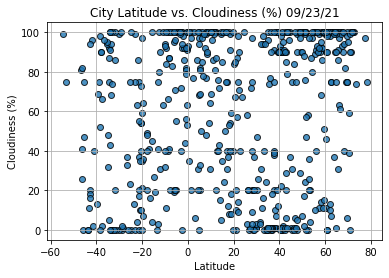

In [106]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

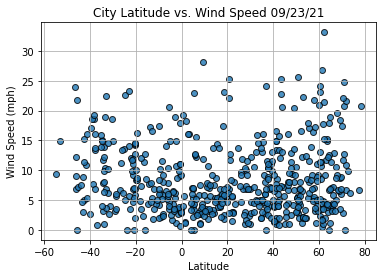

In [107]:
#Mod 6.3.4 Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Mod 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

In [111]:
# Mod 6.4.2 Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [113]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-09-23 21:12:47,38.5167,-28.7000,70.48,64,100,6.89
1,Punta Arenas,CL,2021-09-23 21:12:47,-53.1500,-70.9167,48.31,57,75,14.97
2,Beringovskiy,RU,2021-09-23 21:03:51,63.0500,179.3167,35.80,98,100,11.65
3,Port Elizabeth,ZA,2021-09-23 21:12:48,-33.9180,25.5701,62.10,75,43,13.85
4,Qaanaaq,GL,2021-09-23 21:02:54,77.4840,-69.3632,16.20,62,97,6.71
...,...,...,...,...,...,...,...,...,...
544,Fayetteville,US,2021-09-23 21:15:08,35.0527,-78.8784,80.10,46,1,5.01
545,Waipawa,NZ,2021-09-23 21:16:29,-41.4122,175.5153,57.45,63,2,5.39
546,Loiza,PR,2021-09-23 21:16:30,18.4313,-65.8802,91.38,62,40,6.91
547,Malanje,AO,2021-09-23 21:16:30,-9.5402,16.3410,73.49,55,100,10.20


In [117]:
index13 = city_data_df.loc[13]
index13

City                     Katsuura
Country                        JP
Date          2021-09-23 21:12:52
Lat                       35.1333
Lng                         140.3
Max Temp                    73.51
Humidity                       79
Cloudiness                    100
Wind Speed                  13.02
Name: 13, dtype: object

In [119]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
544     True
545    False
546     True
547    False
548     True
Name: Lat, Length: 549, dtype: bool

In [120]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-09-23 21:12:47,38.5167,-28.7000,70.48,64,100,6.89
2,Beringovskiy,RU,2021-09-23 21:03:51,63.0500,179.3167,35.80,98,100,11.65
4,Qaanaaq,GL,2021-09-23 21:02:54,77.4840,-69.3632,16.20,62,97,6.71
7,Havre-Saint-Pierre,CA,2021-09-23 21:12:49,50.2334,-63.5986,50.27,80,100,10.54
9,Nikolskoye,RU,2021-09-23 21:12:50,59.7035,30.7861,47.01,93,99,9.22
...,...,...,...,...,...,...,...,...,...
540,Namie,JP,2021-09-23 21:16:28,37.4833,141.0000,69.55,90,100,4.59
543,Morant Bay,JM,2021-09-23 21:16:29,17.8815,-76.4093,83.82,74,53,4.45
544,Fayetteville,US,2021-09-23 21:15:08,35.0527,-78.8784,80.10,46,1,5.01
546,Loiza,PR,2021-09-23 21:16:30,18.4313,-65.8802,91.38,62,40,6.91


In [121]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-09-23 21:12:47,38.5167,-28.7000,70.48,64,100,6.89
2,Beringovskiy,RU,2021-09-23 21:03:51,63.0500,179.3167,35.80,98,100,11.65
4,Qaanaaq,GL,2021-09-23 21:02:54,77.4840,-69.3632,16.20,62,97,6.71
7,Havre-Saint-Pierre,CA,2021-09-23 21:12:49,50.2334,-63.5986,50.27,80,100,10.54
9,Nikolskoye,RU,2021-09-23 21:12:50,59.7035,30.7861,47.01,93,99,9.22


In [128]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [129]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-09-23 21:12:47,38.5167,-28.7000,70.48,64,100,6.89
2,Beringovskiy,RU,2021-09-23 21:03:51,63.0500,179.3167,35.80,98,100,11.65
4,Qaanaaq,GL,2021-09-23 21:02:54,77.4840,-69.3632,16.20,62,97,6.71
7,Havre-Saint-Pierre,CA,2021-09-23 21:12:49,50.2334,-63.5986,50.27,80,100,10.54
9,Nikolskoye,RU,2021-09-23 21:12:50,59.7035,30.7861,47.01,93,99,9.22


In [130]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Punta Arenas,CL,2021-09-23 21:12:47,-53.1500,-70.9167,48.31,57,75,14.97
3,Port Elizabeth,ZA,2021-09-23 21:12:48,-33.9180,25.5701,62.10,75,43,13.85
5,Carnarvon,AU,2021-09-23 21:03:28,-24.8667,113.6333,66.40,80,0,22.59
6,Busselton,AU,2021-09-23 21:12:49,-33.6500,115.3333,43.09,80,0,10.36
8,Hobart,AU,2021-09-23 21:08:22,-42.8794,147.3294,49.86,74,20,3.00


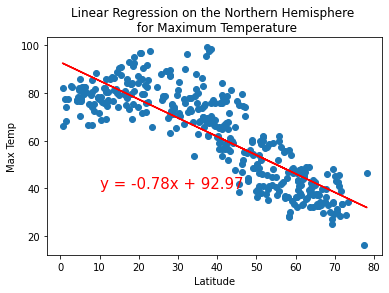

y = -0.78x + 92.97
The r-value for the linear regression on the Northern Hemisphere for Max Temp is: -0.843


In [149]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value for the linear regression on the Northern Hemisphere for Max Temp is: {r_value:.3f}")

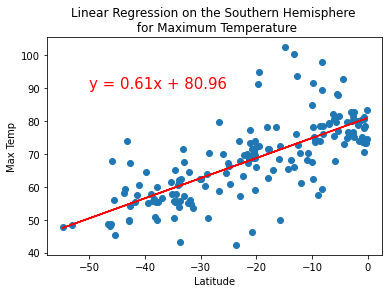

y = 0.61x + 80.96
The r-value for the linear regression on the Sourthern Hemisphere for Max Temp is: 0.731


In [150]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value for the linear regression on the Sourthern Hemisphere for Max Temp is: {r_value:.3f}")

# Mod 6.4.3 Find the Correlation Between Latitude and Percent Humidity

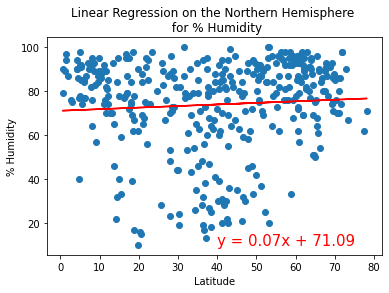

y = 0.07x + 71.09
The r-value for the linear regression on the Northern Hemisphere for Max Temp is: 0.069


In [151]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value for the linear regression on the Northern Hemisphere for % Humidity is: {r_value:.3f}")

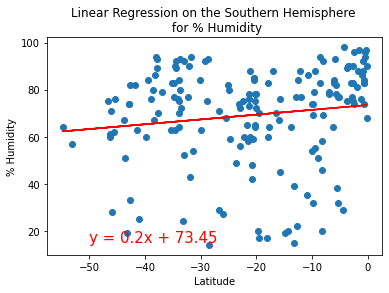

y = 0.2x + 73.45
The r-value for the linear regression on the Sourthern Hemisphere for % Humidity is: 0.141


In [153]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value for the linear regression on the Sourthern Hemisphere for % Humidity is: {r_value:.3f}")

# Mod 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

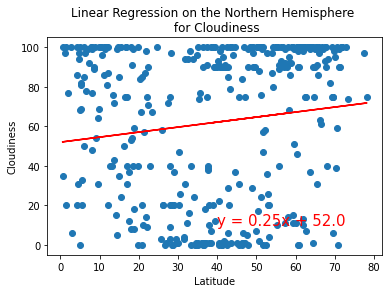

y = 0.25x + 52.0
The r-value for the linear regression on the Northern Hemisphere for Cloudiness is: 0.134


In [163]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', 'Cloudiness',(40,10))


# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value for the linear regression on the Northern Hemisphere for Cloudiness is: {r_value:.3f}")

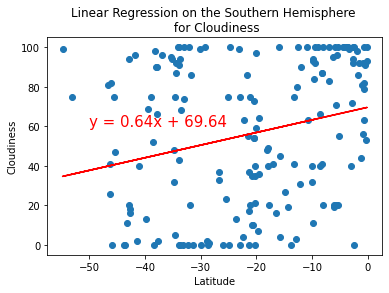

y = 0.64x + 69.64
The r-value for the linear regression on the Southern Hemisphere for Cloudiness is: 0.251


In [161]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness', 'Cloudiness',(-50,60))


# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value for the linear regression on the Southern Hemisphere for Cloudiness is: {r_value:.3f}")

# Mod 6.4.5 Find the Correlation Between Latitude and Wind Speed

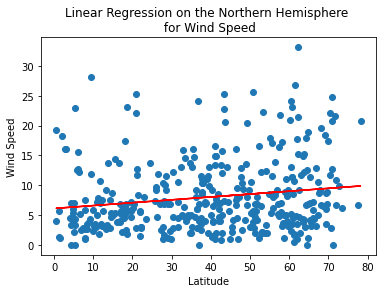

In [175]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

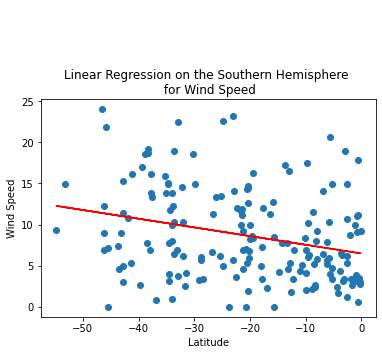

In [177]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

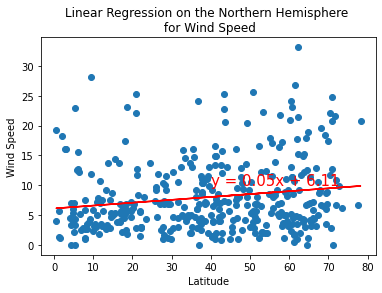

y = 0.05x + 6.11
The r-value for the linear regression on the Northern Hemisphere for Wind Speed is: 0.166


In [179]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,10))


# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value for the linear regression on the Northern Hemisphere for Wind Speed is: {r_value:.3f}")

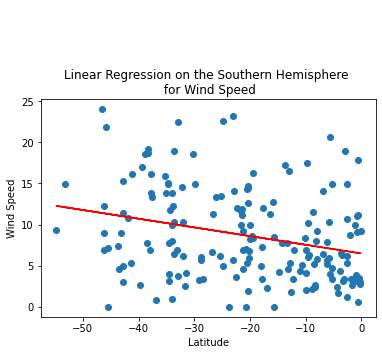

y = -0.11x + 6.49
The r-value for the linear regression on the Southern Hemisphere for Wind Speed is: -0.277


In [194]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))


# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value for the linear regression on the Southern Hemisphere for Wind Speed is: {r_value:.3f}")